## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [4]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [6]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [8]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.4609 - acc: 0.4807 - val_loss: 1.5403 - val_acc: 0.4541
Epoch 2/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.4288 - acc: 0.4909 - val_loss: 1.4446 - val_acc: 0.4851
Epoch 3/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.3987 - acc: 0.5008 - val_loss: 1.4315 - val_acc: 0.4799
Epoch 4/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3695 - acc: 0.5106 - val_loss: 1.5039 - val_acc: 0.4781
Epoch 5/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3505 - acc: 0.5172 - val_loss: 1.4345 - val_acc: 0.4886
Epoch 6/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.3174 - acc: 0.5303 - val_loss: 1.4033 - val_acc: 0.5012
Epoch 7/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.2923 - acc: 0.5382 - val_loss: 1.4308 - 

50000/50000 [==============================] - 4s 87us/step - loss: 0.4894 - acc: 0.8246 - val_loss: 2.1623 - val_acc: 0.5016
Epoch 60/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.4739 - acc: 0.8300 - val_loss: 2.1823 - val_acc: 0.5059
Epoch 61/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.4863 - acc: 0.8244 - val_loss: 2.2270 - val_acc: 0.5077
Epoch 62/500
50000/50000 [==============================] - 4s 85us/step - loss: 0.4697 - acc: 0.8300 - val_loss: 2.2350 - val_acc: 0.5000
Epoch 63/500
50000/50000 [==============================] - 4s 83us/step - loss: 0.4594 - acc: 0.8356 - val_loss: 2.2395 - val_acc: 0.5051
Epoch 64/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.4436 - acc: 0.8405 - val_loss: 2.3702 - val_acc: 0.5013
Epoch 65/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.4430 - acc: 0.8403 - val_loss: 2.3270 - val_acc: 0.5004
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2303 - acc: 0.9176 - val_loss: 3.5416 - val_acc: 0.4928
Epoch 119/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2549 - acc: 0.9072 - val_loss: 3.5798 - val_acc: 0.4915
Epoch 120/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2501 - acc: 0.9113 - val_loss: 3.5723 - val_acc: 0.4916
Epoch 121/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2143 - acc: 0.9232 - val_loss: 3.5497 - val_acc: 0.4975
Epoch 122/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.2097 - acc: 0.9242 - val_loss: 3.6390 - val_acc: 0.4957
Epoch 123/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2423 - acc: 0.9126 - val_loss: 3.6094 - val_acc: 0.4937
Epoch 124/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2165 - acc: 0.9230 - val_loss: 3.6256 - val_acc: 0.4883
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 80us/step - loss: 0.1528 - acc: 0.9458 - val_loss: 4.3041 - val_acc: 0.4960
Epoch 177/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1631 - acc: 0.9431 - val_loss: 4.2568 - val_acc: 0.4959
Epoch 178/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1822 - acc: 0.9368 - val_loss: 4.3929 - val_acc: 0.4892
Epoch 179/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1642 - acc: 0.9426 - val_loss: 4.3269 - val_acc: 0.4964
Epoch 180/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1438 - acc: 0.9480 - val_loss: 4.3977 - val_acc: 0.4822
Epoch 181/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1602 - acc: 0.9430 - val_loss: 4.4813 - val_acc: 0.4787
Epoch 182/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.2288 - acc: 0.9203 - val_loss: 4.2362 - val_acc: 0.4913
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 4s 81us/step - loss: 0.1334 - acc: 0.9535 - val_loss: 4.8340 - val_acc: 0.4832
Epoch 235/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1180 - acc: 0.9586 - val_loss: 4.7079 - val_acc: 0.4953
Epoch 236/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.1380 - acc: 0.9534 - val_loss: 4.8329 - val_acc: 0.4895
Epoch 237/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.1358 - acc: 0.9529 - val_loss: 4.7553 - val_acc: 0.4818
Epoch 238/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.1212 - acc: 0.9580 - val_loss: 4.7669 - val_acc: 0.4846
Epoch 239/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1253 - acc: 0.9570 - val_loss: 4.6786 - val_acc: 0.4905
Epoch 240/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.1387 - acc: 0.9516 - val_loss: 4.7589 - val_acc: 0.4887
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 83us/step - loss: 0.0891 - acc: 0.9694 - val_loss: 5.0050 - val_acc: 0.4893
Epoch 293/500
50000/50000 [==============================] - 4s 83us/step - loss: 0.1880 - acc: 0.9420 - val_loss: 5.0785 - val_acc: 0.4799
Epoch 294/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.1898 - acc: 0.9379 - val_loss: 4.9281 - val_acc: 0.4857
Epoch 295/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0966 - acc: 0.9669 - val_loss: 5.0046 - val_acc: 0.4880
Epoch 296/500
50000/50000 [==============================] - 4s 83us/step - loss: 0.0994 - acc: 0.9671 - val_loss: 4.9848 - val_acc: 0.4879
Epoch 297/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0805 - acc: 0.9723 - val_loss: 4.9910 - val_acc: 0.4851
Epoch 298/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0760 - acc: 0.9728 - val_loss: 4.9889 - val_acc: 0.4894
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 0.1020 - acc: 0.9652 - val_loss: 5.0946 - val_acc: 0.4937
Epoch 351/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0830 - acc: 0.9717 - val_loss: 5.2102 - val_acc: 0.4846
Epoch 352/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1533 - acc: 0.9505 - val_loss: 5.1377 - val_acc: 0.4868
Epoch 353/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0827 - acc: 0.9719 - val_loss: 5.1174 - val_acc: 0.4956
Epoch 354/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0809 - acc: 0.9728 - val_loss: 5.1501 - val_acc: 0.4908
Epoch 355/500
50000/50000 [==============================] - 4s 84us/step - loss: 0.0828 - acc: 0.9719 - val_loss: 5.1680 - val_acc: 0.4884
Epoch 356/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.1323 - acc: 0.9569 - val_loss: 5.2278 - val_acc: 0.4853
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 81us/step - loss: 0.0419 - acc: 0.9859 - val_loss: 5.3372 - val_acc: 0.4881
Epoch 409/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2821 - acc: 0.9237 - val_loss: 5.2526 - val_acc: 0.4838
Epoch 410/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.1389 - acc: 0.9566 - val_loss: 5.2659 - val_acc: 0.4834
Epoch 411/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0729 - acc: 0.9752 - val_loss: 5.3817 - val_acc: 0.4869
Epoch 412/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0433 - acc: 0.9852 - val_loss: 5.3641 - val_acc: 0.4957
Epoch 413/500
50000/50000 [==============================] - 4s 82us/step - loss: 0.0479 - acc: 0.9834 - val_loss: 5.3631 - val_acc: 0.4876
Epoch 414/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0545 - acc: 0.9812 - val_loss: 5.3275 - val_acc: 0.4896
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 4s 81us/step - loss: 0.0115 - acc: 0.9971 - val_loss: 5.3692 - val_acc: 0.4911
Epoch 467/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0811 - acc: 0.9741 - val_loss: 5.3976 - val_acc: 0.4907
Epoch 468/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.2807 - acc: 0.9266 - val_loss: 5.3614 - val_acc: 0.4880
Epoch 469/500
50000/50000 [==============================] - 4s 81us/step - loss: 0.0661 - acc: 0.9778 - val_loss: 5.3116 - val_acc: 0.4857
Epoch 470/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0241 - acc: 0.9922 - val_loss: 5.2783 - val_acc: 0.4929
Epoch 471/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0310 - acc: 0.9902 - val_loss: 5.3941 - val_acc: 0.4919
Epoch 472/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.0937 - acc: 0.9701 - val_loss: 5.3761 - val_acc: 0.4908
Epoch 473/500
50000/50000 [=======

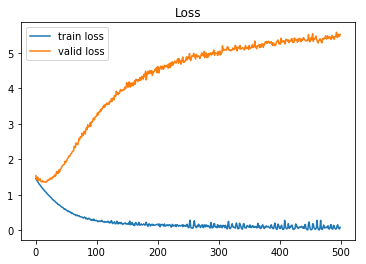

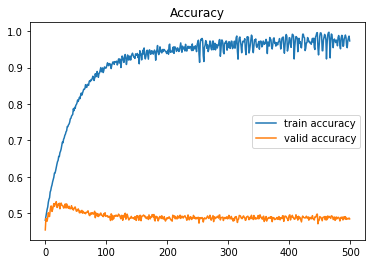

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()